# <font style="color:blue">1. Link Google Drive </font>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
%cd /content/drive/"My Drive"/Iniciativas/20200801_Face_Mask_Detected

/content/drive/My Drive/Iniciativas/20200801_Face_Mask_Detected


# <font style="color:blue">2. Clone the DarkNet Repository </font>

In [ ]:
!git clone https://github.com/AlexeyAB/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 14086, done.
remote: Total 14086 (delta 0), reused 0 (delta 0), pack-reused 14086
Receiving objects: 100% (14086/14086), 12.70 MiB | 1.92 MiB/s, done.
Resolving deltas: 100% (9584/9584), done.
Checking out files: 100% (2013/2013), done.


# <font style="color:blue">3. Compile Darknet </font>

In [4]:
%cd darknet

/content/drive/My Drive/Iniciativas/20200801_Face_Mask_Detected/darknet


In [5]:
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

In [6]:
print("Building. . . It might take 2-3 minutes")

!make &> build_log.txt

print("Maked!!!")

Building. . . It might take 2-3 minutes
Maked!!!


# <font style="color:blue">4. Download Code for YOLO Training</font>

In [ ]:
!wget "https://www.dropbox.com/sh/jfyj1wetf28bgpr/AACGJHIlPyKRO70B9DlAVqWPa?dl=1" -O yolov3-ambulance-code.zip
!unzip yolov3-ambulance-code.zip

--2020-08-01 18:35:52--  https://www.dropbox.com/sh/jfyj1wetf28bgpr/AACGJHIlPyKRO70B9DlAVqWPa?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/dl/jfyj1wetf28bgpr/AACGJHIlPyKRO70B9DlAVqWPa [following]
--2020-08-01 18:35:53--  https://www.dropbox.com/sh/dl/jfyj1wetf28bgpr/AACGJHIlPyKRO70B9DlAVqWPa
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc77f2da0819b9fff688cf0f46c6.dl.dropboxusercontent.com/zip_download_get/AgAGe6iJfRq9yeXwJaJQMvVcbKU5heHbI7NunxuWGlDIyLIA5OYMI2EdiRDsnI03tEP3QLrEuIltBSQoyGLaJ2TgO_O1YyQ3VAJARRdg9ksS7Q?dl=1 [following]
--2020-08-01 18:35:53--  https://uc77f2da0819b9fff688cf0f46c6.dl.dropboxusercontent.com/zip_download_get/AgAGe6iJfRq9yeXwJaJQMvVcbKU5heHbI7NunxuWGlDIyLIA5OYMI2EdiRDsnI03tEP3QLrEuIltBS

# <font style="color:blue">5. Download weights for Convolutional backbone</font>


In [ ]:
!wget "https://www.dropbox.com/s/18dwbfth7prbf0h/darknet53.conv.74?dl=1" -O darknet53.conv.74

--2020-08-01 18:36:18--  https://www.dropbox.com/s/18dwbfth7prbf0h/darknet53.conv.74?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/18dwbfth7prbf0h/darknet53.conv.74 [following]
--2020-08-01 18:36:18--  https://www.dropbox.com/s/dl/18dwbfth7prbf0h/darknet53.conv.74
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc10d8e295bd70839b06c9436c8a.dl.dropboxusercontent.com/cd/0/get/A8oCvqVceDFcOx7womFG7PqCSx7nw_jA97F6_07y5QYEcBDvlVbemjKEr7LbU6KvGFLganYkEyWGwCPgFwgL2P4FFiSsZBViBRtj3ScJzmS_69POQ3oc8Y9FEnfq55MG2lU/file?dl=1# [following]
--2020-08-01 18:36:19--  https://uc10d8e295bd70839b06c9436c8a.dl.dropboxusercontent.com/cd/0/get/A8oCvqVceDFcOx7womFG7PqCSx7nw_jA97F6_07y5QYEcBDvlVbemjKEr7LbU6KvGFLganYkEyWGwCPgFwgL2P4FFiSsZB

# <font style="color:blue">6. Training Configuration</font>
In the file **`yolov3-ambulance-setup.data`**(included in our code), we need to provide information about the specifications for our object detector and some relevant paths.

The contents of the file are as follows:
```
classes = 1
train  = data_train.txt
valid  = data_test.txt
names = class.names
backup = backup/
```
Along with the yolov3-ambulance-setup.data and class.names files, YOLOv3 also needs a configuration file **`yolov3-ambulance-train.cfg`**. It is based on the demo configuration file, yolov3-voc.cfg (comes with darknet code), which was used to train on the VOC dataset. All the important training parameters are stored in this configuration file. Let us understand what they mean and what values to set them to.

```
[net]
# Testing
# batch=1
# subdivisions=1
# Training
batch=64
subdivisions=16
```

These configuration parameters specify the input image size and the number of channels.

```
width=416
height=416
channels=3
```

The configuration file contains a few parameters that control how the weight is updated.
```
momentum=0.9
decay=0.0005
```

The parameter learning rate controls how aggressively we should learn based on the current batch of data. Typically this is a number between 0.01 and 0.0001.
```
learning_rate=0.001
policy=steps
steps=800
scales=.1
burn_in=100
```

Data aumentation, similarly, if we transform the colors of the entire picture using saturation, exposure, and hue, it is still a picture of the ambulance.
```
angle=0
saturation = 1.5
exposure = 1.5
hue=.1
```

# <font style="color:blue">8. Start Training </font>
For starting training using darknet, we need to execute the following command. Here we are specifying the
1. path to the setup file, 
1. path to config file, 
1. path to convolutional weights file 

and also passing some flags such as:

- **`dont_show`** which wont display the graphs. This is required for Colab since it does not have a display and it will crash if it tries to display, not if you run the notebook on your local system.
- **`map`** - this will calculate mAP - mean average precision for the test data which we have specified using the data_test.txt file which contains 20% of our data.

In [ ]:
!./darknet detector train yolov3-ambulance-setup.data yolov3-ambulance-train.cfg ./darknet53.conv.74 -dont_show -map 2> train_log.txt

Se han truncado las últimas 5000 líneas del flujo de salida.
 (next mAP calculation at 200 iterations) 
 Last accuracy mAP@0.5 = 1.10 %, best = 1.10 % 
 132: 4.696853, 4.226472 avg loss, 0.001000 rate, 3.347465 seconds, 8448 images, 1.523351 hours left
Loaded: 0.000067 seconds

 (next mAP calculation at 200 iterations) 
 Last accuracy mAP@0.5 = 1.10 %, best = 1.10 % 
 133: 4.668317, 4.270657 avg loss, 0.001000 rate, 3.418102 seconds, 8512 images, 1.516188 hours left
Loaded: 0.000035 seconds

 (next mAP calculation at 200 iterations) 
 Last accuracy mAP@0.5 = 1.10 %, best = 1.10 % 
 134: 3.997829, 4.243374 avg loss, 0.001000 rate, 3.252648 seconds, 8576 images, 1.509259 hours left
Loaded: 0.000042 seconds

 (next mAP calculation at 200 iterations) 
 Last accuracy mAP@0.5 = 1.10 %, best = 1.10 % 
 135: 6.738287, 4.492865 avg loss, 0.001000 rate, 3.256645 seconds, 8640 images, 1.501991 hours left
Loaded: 0.000035 seconds

 (next mAP calculation at 200 iterations) 
 Last accuracy mAP@0.5 =

In [7]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

def display_output(imagePath):
    src = cv2.imread(imagePath,1)
    output = cv2.imread("predictions.jpg")

    plt.figure(figsize=[20,8])
    plt.subplot(121)
    plt.imshow(src[:,:,::-1])
    plt.title("Original Image")
    plt.subplot(122)
    plt.imshow(output[:,:,::-1])
    plt.title("Predictions")
    plt.show()

net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 

 seen 64, trained: 64 K-images (1 Kilo-batches_64) 
 Detection layer: 82 - type = 27 
 Detection layer: 94 - type = 27 
 Detection layer: 106 - type = 27 
test-image1.jpg: Predicted in 20.065000 milli-seconds.
Mask: 100%


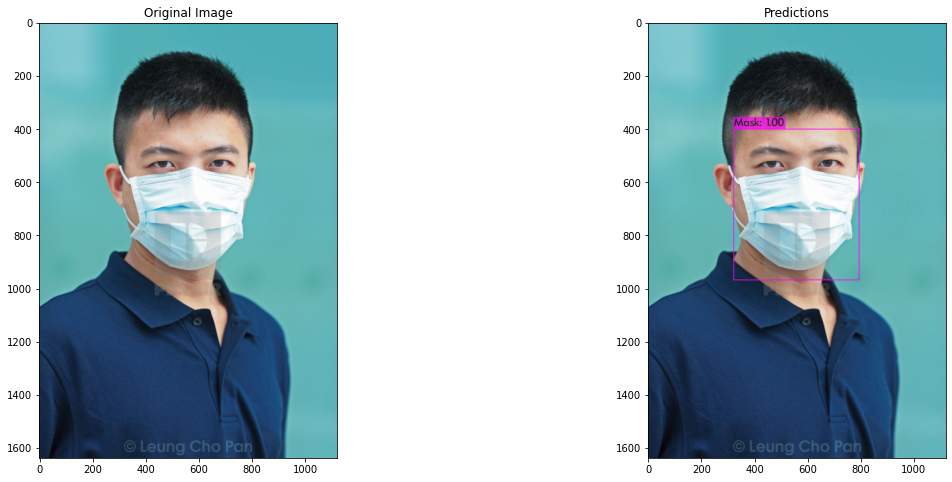

In [ ]:
!./darknet detector test yolov3-ambulance-setup.data yolov3-ambulance-test.cfg backup/yolov3-ambulance-train_best.weights test-image1.jpg -thresh .6 2> test_log.txt
display_output("test-image1.jpg")

net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 

 seen 64, trained: 64 K-images (1 Kilo-batches_64) 
 Detection layer: 82 - type = 27 
 Detection layer: 94 - type = 27 
 Detection layer: 106 - type = 27 
test-image2.jpg: Predicted in 19.862000 milli-seconds.
Mask: 98%
Mask: 90%
No-mask: 97%
Mask: 76%


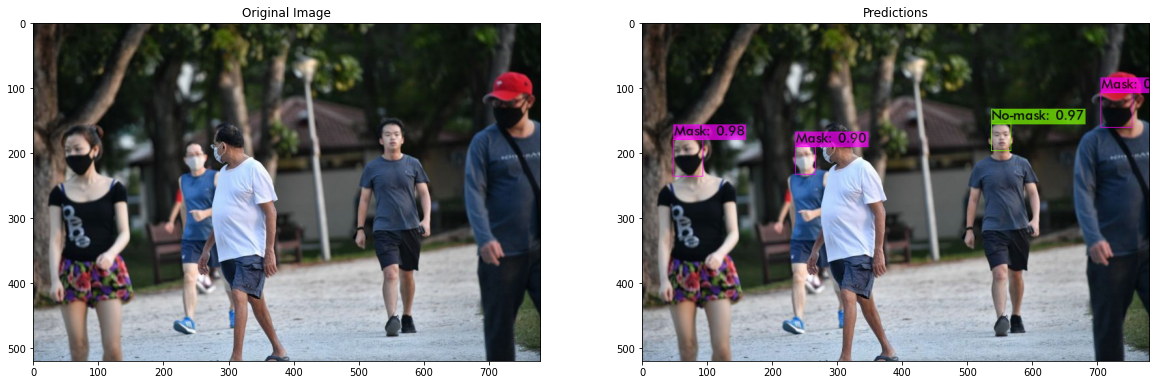

In [ ]:
!./darknet detector test yolov3-ambulance-setup.data yolov3-ambulance-test.cfg backup/yolov3-ambulance-train_best.weights test-image2.jpg -thresh .6 2> test_log.txt
display_output("test-image2.jpg")

net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 

 seen 64, trained: 64 K-images (1 Kilo-batches_64) 
 Detection layer: 82 - type = 27 
 Detection layer: 94 - type = 27 
 Detection layer: 106 - type = 27 
test-image3.jpg: Predicted in 20.135000 milli-seconds.
Mask: 100%
Mask: 100%
No-mask: 81%
Mask: 100%
Mask: 99%
Mask: 99%
Mask: 100%
Mask: 92%
Mask: 100%
Mask: 92%
Mask: 100%
Mask: 100%
Mask: 98%
Mask: 100%
Mask: 100%
Mask: 100%
Mask: 100%


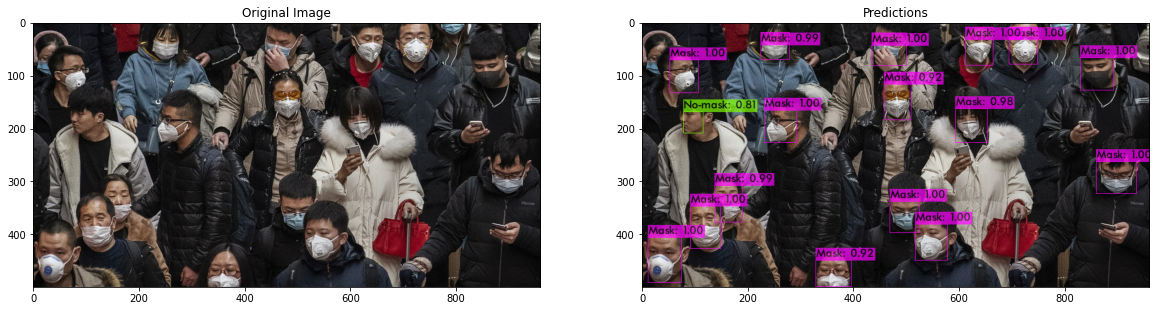

In [ ]:
!./darknet detector test yolov3-ambulance-setup.data yolov3-ambulance-test.cfg backup/yolov3-ambulance-train_best.weights test-image3.jpg -thresh .6 2> test_log.txt
display_output("test-image3.jpg")

net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 

 seen 64, trained: 64 K-images (1 Kilo-batches_64) 
 Detection layer: 82 - type = 27 
 Detection layer: 94 - type = 27 
 Detection layer: 106 - type = 27 
test-image4.jpg: Predicted in 19.944000 milli-seconds.
No-mask: 86%
No-mask: 82%
Mask: 98%
Mask: 100%
No-mask: 77%
Mask: 98%
Mask: 100%


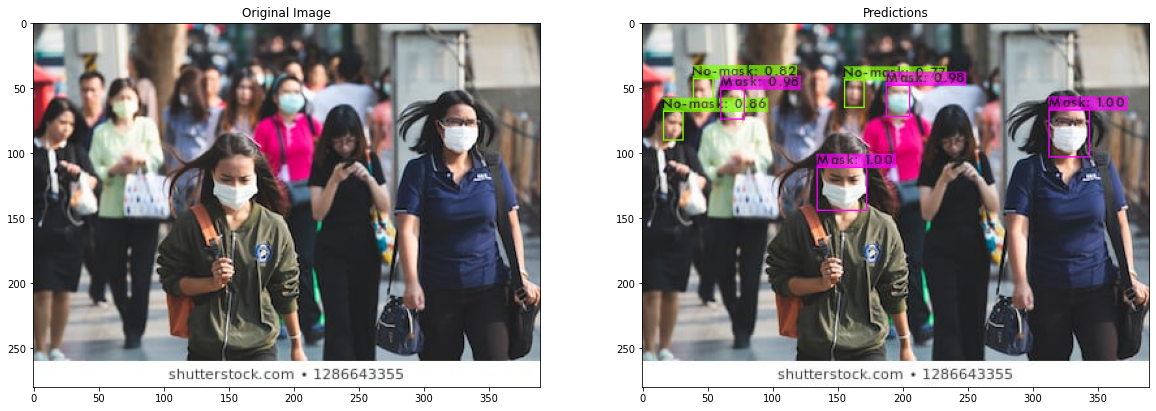

In [ ]:
!./darknet detector test yolov3-ambulance-setup.data yolov3-ambulance-test.cfg backup/yolov3-ambulance-train_best.weights test-image4.jpg -thresh .6 2> test_log.txt
display_output("test-image4.jpg")

In [ ]:
!./darknet detector demo yolov3-ambulance-setup.data yolov3-ambulance-test.cfg backup/yolov3-ambulance-train_best.weights test-video1.mp4 -thresh .6 -out_filename out-vid1.avi -dont_show

Se han truncado las últimas 5000 líneas del flujo de salida.
 cvWriteFrame 
Objects:

No-mask: 100% 
No-mask: 100% 
Mask: 95% 
Mask: 86% 
Mask: 84% 

FPS:44.0 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

No-mask: 100% 
No-mask: 100% 
Mask: 97% 
Mask: 96% 
Mask: 95% 

FPS:44.1 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

No-mask: 100% 
No-mask: 100% 
Mask: 97% 
Mask: 96% 
Mask: 94% 

FPS:42.7 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

No-mask: 100% 
No-mask: 97% 
Mask: 96% 
Mask: 96% 
Mask: 95% 

FPS:43.1 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

No-mask: 100% 
Mask: 100% 
Mask: 99% 
Mask: 95% 
Mask: 95% 

FPS:43.8 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

No-mask: 100% 
Mask: 100% 
Mask: 99% 
Mask: 96% 
Mask: 95% 

FPS:43.2 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

No-mask: 96% 
Mask: 100% 
Mask: 99% 
Mask: 99% 
Mask: 96% 

FPS:42.9 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

Mask: 100% 
Mask: 100% 
Mask: 100% 
Mask: 97% 
Mask: 96% 

FPS:42.9 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

Mask: 100% 
Mask: 100% 
Ma

In [ ]:
!./darknet detector demo yolov3-ambulance-setup.data yolov3-ambulance-test.cfg backup/yolov3-ambulance-train_best.weights test-video2.mp4 -thresh .6 -out_filename out-vid2.avi -dont_show

# <font style="color:blue">8. Start Training Yolov4 </font>

In [6]:
#!./darknet detector train obj.data yolo-obj.cfg ./yolov4.conv.137 -dont_show -map 2> train_log.txt

## After each 100 iterations you can stop and later start training from this point. For example,
## after 2000 iterations you can stop training, and later just start training using:
#!./darknet detector train obj.data yolo-obj.cfg ./backup/yolo-obj_1000.weights -dont_show -map 2> train_log.txt
!./darknet detector train obj.data yolo-obj.cfg ./backup/yolo-obj_2000.weights -dont_show -map 2> train_log.txt


 (next mAP calculation at 3300 iterations) 
 Last accuracy mAP@0.5 = 88.38 %, best = 88.91 % 
 3214: 2.265791, 1.785518 avg loss, 0.000100 rate, 11.965146 seconds, 205696 images, 1.738866 hours left
Loaded: 0.000037 seconds

 (next mAP calculation at 3300 iterations) 
 Last accuracy mAP@0.5 = 88.38 %, best = 88.91 % 
 3215: 2.034403, 1.810407 avg loss, 0.000100 rate, 11.823312 seconds, 205760 images, 1.747602 hours left
Loaded: 0.000047 seconds

 (next mAP calculation at 3300 iterations) 
 Last accuracy mAP@0.5 = 88.38 %, best = 88.91 % 
 3216: 1.673481, 1.796714 avg loss, 0.000100 rate, 11.918785 seconds, 205824 images, 1.755907 hours left
Loaded: 0.000035 seconds

 (next mAP calculation at 3300 iterations) 
 Last accuracy mAP@0.5 = 88.38 %, best = 88.91 % 
 3217: 2.415335, 1.858576 avg loss, 0.000100 rate, 12.630631 seconds, 205888 images, 1.764305 hours left
Loaded: 0.000050 seconds

 (next mAP calculation at 3300 iterations) 
 Last accuracy mAP@0.5 = 88.38 %, best = 88.91 % 
 3218

net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 

 seen 64, trained: 217 K-images (3 Kilo-batches_64) 
 Detection layer: 139 - type = 27 
 Detection layer: 150 - type = 27 
 Detection layer: 161 - type = 27 
test-image1.jpg: Predicted in 43.493000 milli-seconds.
Mask: 100%


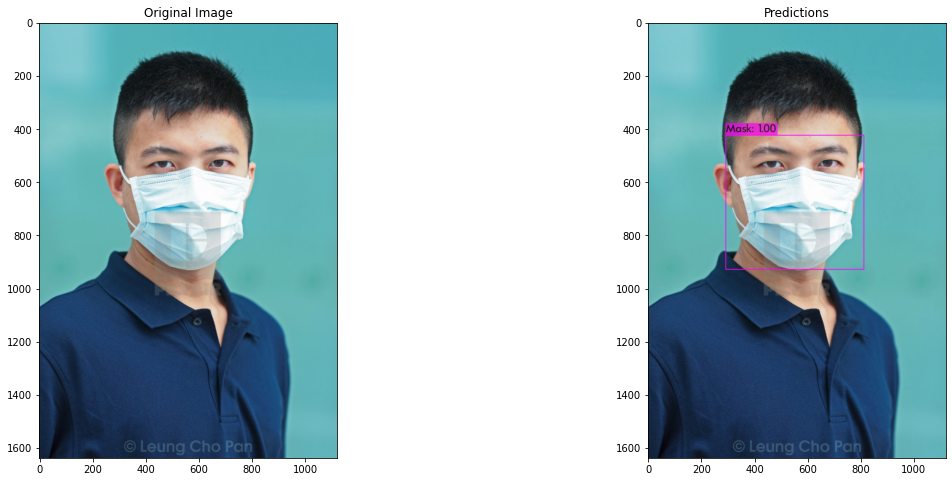

In [8]:
!./darknet detector test obj.data yolo-obj-test.cfg backup/yolo-obj_best.weights test-image1.jpg -thresh .6 2> test_log.txt
display_output("test-image1.jpg")

net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 

 seen 64, trained: 217 K-images (3 Kilo-batches_64) 
 Detection layer: 139 - type = 27 
 Detection layer: 150 - type = 27 
 Detection layer: 161 - type = 27 
test-image2.jpg: Predicted in 43.276000 milli-seconds.
Mask: 100%
Mask: 99%
Mask: 78%
No-mask: 99%
Mask: 97%


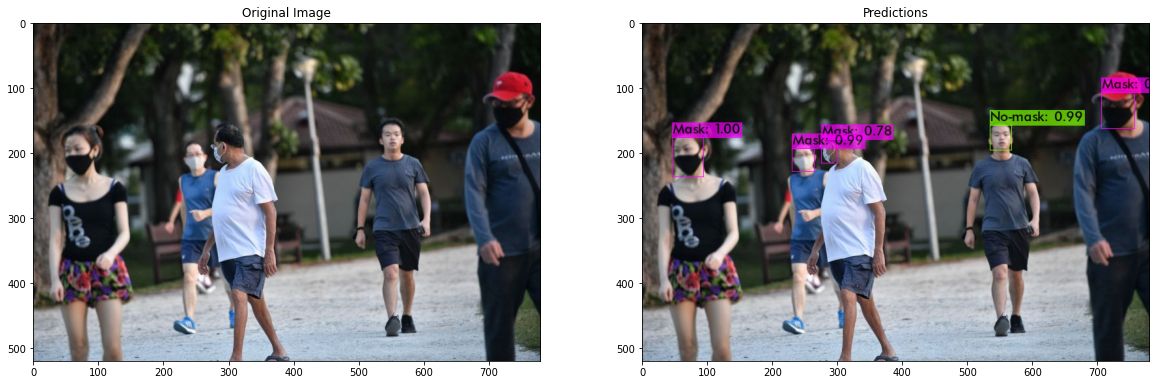

In [9]:
!./darknet detector test obj.data yolo-obj-test.cfg backup/yolo-obj_best.weights test-image2.jpg -thresh .6 2> test_log.txt
display_output("test-image2.jpg")

net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 

 seen 64, trained: 217 K-images (3 Kilo-batches_64) 
 Detection layer: 139 - type = 27 
 Detection layer: 150 - type = 27 
 Detection layer: 161 - type = 27 
test-image3.jpg: Predicted in 43.482000 milli-seconds.
Mask: 100%
Mask: 71%
Mask: 100%
No-mask: 99%
Mask: 100%
Mask: 100%
Mask: 100%
Mask: 98%
Mask: 100%
Mask: 99%
Mask: 100%
Mask: 100%
Mask: 100%
Mask: 100%
Mask: 100%
Mask: 100%
Mask: 98%
Mask: 100%
Mask: 100%


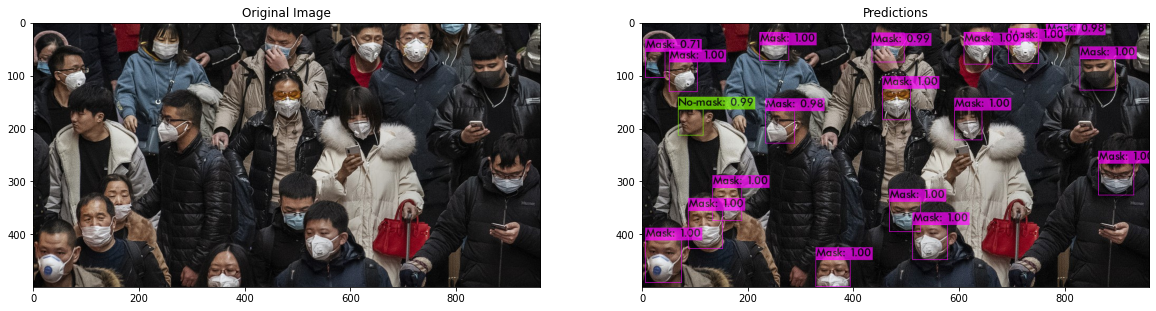

In [10]:
!./darknet detector test obj.data yolo-obj-test.cfg backup/yolo-obj_best.weights test-image3.jpg -thresh .6 2> test_log.txt
display_output("test-image3.jpg")

net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 
nms_kind: greedynms (1), beta = 0.600000 

 seen 64, trained: 217 K-images (3 Kilo-batches_64) 
 Detection layer: 139 - type = 27 
 Detection layer: 150 - type = 27 
 Detection layer: 161 - type = 27 
test-image4.jpg: Predicted in 43.307000 milli-seconds.
No-mask: 88%
No-mask: 83%
Mask: 99%
Mask: 100%
No-mask: 97%
Mask: 100%
No-mask: 92%
Mask: 100%


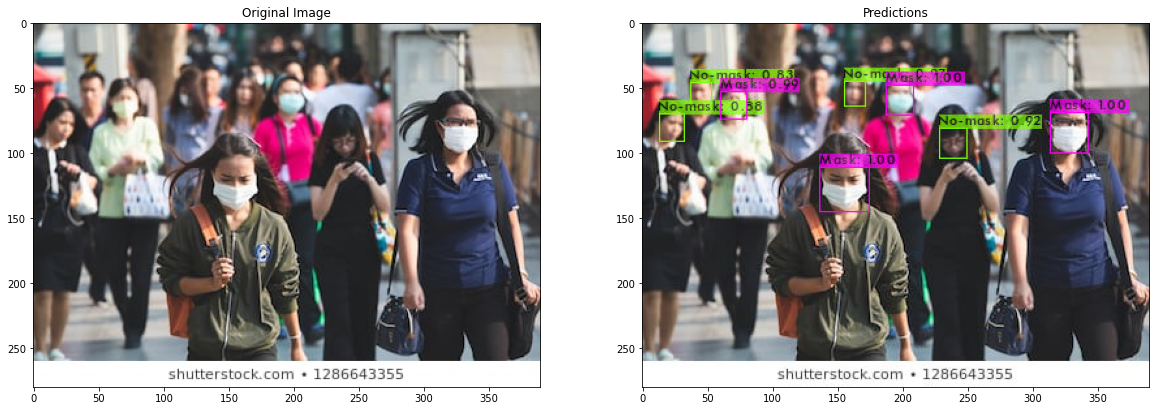

In [11]:
!./darknet detector test obj.data yolo-obj-test.cfg backup/yolo-obj_best.weights test-image4.jpg -thresh .6 2> test_log.txt
display_output("test-image4.jpg")

In [7]:
!./darknet detector demo obj.data yolo-obj-test.cfg backup/yolo-obj_best.weights test-video1.mp4 -thresh .6 -out_filename out-vid1.avi -dont_show

Se han truncado las últimas 5000 líneas del flujo de salida.
FPS:34.3 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

No-mask: 100% 
No-mask: 99% 
No-mask: 95% 
No-mask: 91% 
Mask: 98% 

FPS:34.8 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

No-mask: 100% 
No-mask: 99% 
No-mask: 95% 
No-mask: 91% 
Mask: 98% 

FPS:34.8 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

No-mask: 100% 
No-mask: 99% 
No-mask: 95% 
Mask: 99% 
Mask: 91% 

FPS:35.2 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

No-mask: 100% 
No-mask: 99% 
No-mask: 94% 
No-mask: 82% 
Mask: 99% 
Mask: 64% 

FPS:34.6 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

No-mask: 100% 
No-mask: 99% 
No-mask: 93% 
No-mask: 64% 
Mask: 99% 
Mask: 82% 

FPS:33.9 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

No-mask: 100% 
No-mask: 99% 
No-mask: 93% 
Mask: 100% 
Mask: 92% 

FPS:34.1 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

No-mask: 100% 
No-mask: 99% 
No-mask: 94% 
Mask: 100% 
Mask: 98% 

FPS:33.2 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

No-mask: 100% 
No-mask: 99% 
No-mask: 94% 
Mask: 

In [8]:
!./darknet detector demo obj.data yolo-obj-test.cfg backup/yolo-obj_best.weights test-video2.mp4 -thresh .6 -out_filename out-vid2.avi -dont_show

Se han truncado las últimas 5000 líneas del flujo de salida.
No-mask: 94% 
Mask: 99% 

FPS:35.3 	 AVG_FPS:35.7

 cvWriteFrame 
Objects:

No-mask: 100% 
No-mask: 87% 
No-mask: 76% 
No-mask: 65% 
Mask: 99% 

FPS:34.8 	 AVG_FPS:35.7

 cvWriteFrame 
Objects:

No-mask: 100% 
No-mask: 81% 
Mask: 92% 
Mask: 79% 

FPS:34.3 	 AVG_FPS:35.7

 cvWriteFrame 
Objects:

No-mask: 100% 
Mask: 81% 

FPS:33.9 	 AVG_FPS:35.7

 cvWriteFrame 
Objects:

No-mask: 100% 
No-mask: 66% 

FPS:33.9 	 AVG_FPS:35.7

 cvWriteFrame 
Objects:

No-mask: 98% 
Mask: 72% 

FPS:33.5 	 AVG_FPS:35.7

 cvWriteFrame 
Objects:

No-mask: 98% 
Mask: 79% 

FPS:33.2 	 AVG_FPS:35.7

 cvWriteFrame 
Objects:

No-mask: 97% 

FPS:32.8 	 AVG_FPS:35.7

 cvWriteFrame 
Objects:

No-mask: 99% 
No-mask: 74% 
Mask: 61% 

FPS:32.5 	 AVG_FPS:35.7

 cvWriteFrame 
Objects:

No-mask: 99% 
No-mask: 87% 
Mask: 98% 

FPS:32.5 	 AVG_FPS:35.7

 cvWriteFrame 
Objects:

No-mask: 97% 
No-mask: 94% 
No-mask: 71% 
Mask: 94% 

FPS:32.2 	 AVG_FPS:35.7

 cvWriteF